In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor as gbm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import cross_val_score, KFold

[*********************100%%**********************]  1 of 1 completed


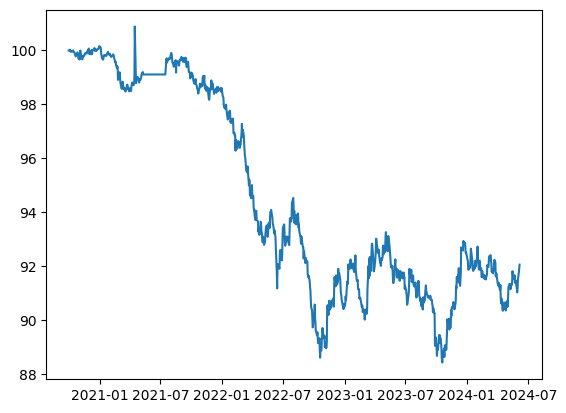

In [2]:
# Specify the ticker symbol for the stock you're interested in
# Example: Petrobras (PBR) listed in B3
ticker_symbol = "NVDA"

# Download historical market data
data = yf.download(ticker_symbol, start="2000-02-01", end="2024-06-06")

# Display the data
plt.plot(data['Open'])

In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-01,0.773438,0.796875,0.744792,0.790365,0.725004,9297600
2000-02-02,0.794271,0.828125,0.790365,0.812500,0.745308,14904000
2000-02-03,0.838542,0.855469,0.820313,0.825521,0.757252,10824000
2000-02-04,0.851563,0.851563,0.828125,0.845052,0.775168,12369600
2000-02-07,0.848958,0.848958,0.791667,0.792969,0.727392,21748800
...,...,...,...,...,...,...
2024-05-30,1146.500000,1158.189941,1096.630005,1105.000000,1105.000000,48735000
2024-05-31,1125.199951,1127.170044,1069.400024,1096.329956,1096.329956,61326300
2024-06-03,1136.209961,1150.000000,1120.030029,1150.000000,1150.000000,43839200


In [7]:
data.index

DatetimeIndex(['2000-02-01', '2000-02-02', '2000-02-03', '2000-02-04',
               '2000-02-07', '2000-02-08', '2000-02-09', '2000-02-10',
               '2000-02-11', '2000-02-14',
               ...
               '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-03',
               '2024-06-04', '2024-06-05'],
              dtype='datetime64[ns]', name='Date', length=6125, freq=None)

In [8]:
close = data['Close']

In [9]:
corr = []
lags = [30,60,120,365,600]
for lag in lags:
    cor = close.autocorr(lag=lag)
    corr.append(cor)
corr

[0.9829577560770321,
 0.9673321695428713,
 0.9251534074817744,
 0.7669918477937198,
 0.9451582424522386]

In [ ]:
for i in len(data)-30:
    td= data.transpose().iloc[:,i-30:i]
    dt = td.transpose()

In [84]:
data[['Close']].transpose().iloc[:,0:30].values[0]

array([5.19999981, 5.30000019, 5.44999981, 5.58799982, 5.625     ,
       5.75      , 5.625     , 5.46299982, 5.28800011, 5.21299982,
       5.3130002 , 5.73799992, 5.6880002 , 5.5630002 , 5.55000019,
       5.5250001 , 5.5630002 , 5.71299982, 5.86299992, 5.75      ,
       5.7750001 , 5.875     , 5.83799982, 6.03800011, 6.03800011,
       6.03800011, 6.18100023, 6.39900017, 6.21299982, 6.21299982])

In [149]:
test = []
for i in range(0,30,3):
    test.append(i)

In [13]:
len(data)

6125

In [10]:
lags = 60
values = []
for i in range(0,len(data)-lags,lags):
    d = data['Close'].values[i:i+lags]
    values.append(d)

In [11]:
varray = np.array(values)
varrayT = varray.T
vdict = {f"t{i}": varrayT[i] for i in range(0, lags)}
df = pd.DataFrame(vdict)

In [12]:
len(df)

102

In [62]:
X = df.iloc[:,:30]
y = df.iloc[:,30:]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=.2, shuffle=True, random_state=42)
gbm_obj = gbm(n_estimators=300, learning_rate=.1, random_state=42, verbose=1)
multi_output_gb = MultiOutputRegressor(gbm_obj)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(multi_output_gb, X, y, cv=kfold, scoring='neg_mean_squared_error')


multi_output_gb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       12811.4893            0.50s
         2       10389.9806            0.25s
         3        8427.7045            0.80s
         4        6837.1393            0.79s
         5        5548.2955            0.75s
         6        4502.9022            0.72s
         7        3655.8861            0.70s
         8        2967.5528            0.72s
         9        2410.2671            0.70s
        10        1957.0348            0.68s
        20         245.2076            0.71s
        30          31.0758            0.52s
        40           3.9781            0.48s
        50           0.5234            0.51s
        60           0.0744            0.46s
        70           0.0151            0.44s
        80           0.0049            0.40s
        90           0.0021            0.37s
       100           0.0011            0.39s
       200           0.0000            0.21s
       300           0.0000            0.00s
      Ite

MultiOutputRegressor(estimator=GradientBoostingRegressor(n_estimators=300,
                                                         random_state=42,
                                                         verbose=1))

In [63]:
y_pred = multi_output_gb.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 56.21136140777666


In [64]:
y_predT = y_pred.T

In [65]:
y_predT.shape

(30, 21)

In [66]:
y_pred_df = pd.DataFrame({f"t{i+55}": y_predT[i] for i in range(0, 5)})

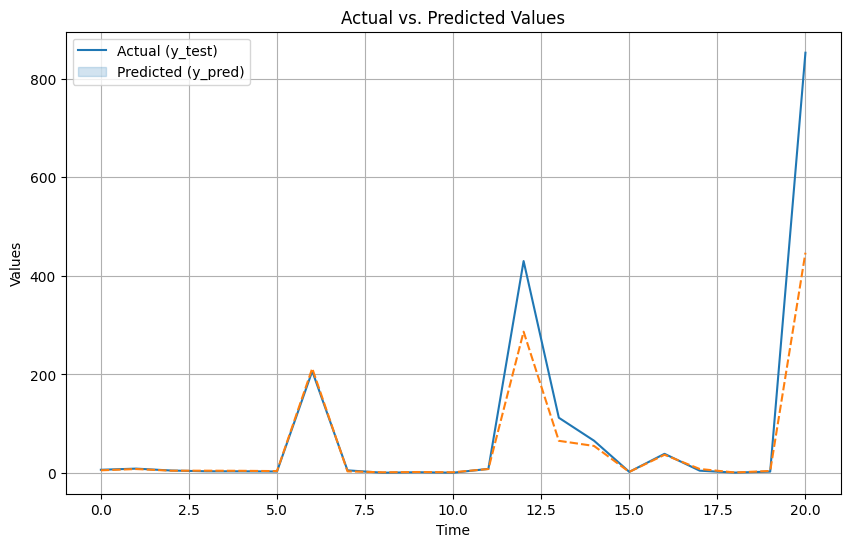

In [67]:
df2 = pd.DataFrame({'y_test': y_test['t59'].reset_index(drop=True), 'y_pred': y_pred_df['t59']})
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')

# Display the plot
plt.legend(['Actual (y_test)', 'Predicted (y_pred)'])
plt.grid(True)
plt.show()